In [174]:
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt

s_rate=1
random.seed(1234567)


In [175]:
def simulate(a_rate):
    mean_delay=[]
    means_cust=[]
    for i in range(30):

        clock = 0
        next_arrival=random.expovariate(a_rate)

        next_departure=clock+ next_arrival + random.expovariate(s_rate)
        queue = []
        customers_in_queue = 0
        total_delay = 0
        total_customers = 0
        queue_snapshot=[]
        system_stat=False 
        while total_customers < 3000:
                    if next_arrival < next_departure: 
                        clock = next_arrival
                        total_customers += 1
                        customers_in_queue += 1
                        queue.insert(0, clock)  
                        next_arrival += random.expovariate(a_rate)
                        if customers_in_queue == 1:
                            service_time=random.expovariate(s_rate)
                            next_departure = clock + service_time

                           
                    else:
                        clock = next_departure
                        lifo_time=queue.pop(0)
                        if total_customers > 800:
                            total_delay += clock - lifo_time  
                            queue_snapshot.append(len(queue))
                        customers_in_queue -= 1
                        if customers_in_queue == 0:
                            next_departure = float('inf')
                        else:
                            service_time=random.expovariate(s_rate)
                            next_departure = clock + service_time
                            if total_customers>800:
                                total_delay += service_time

                            
        
        means_cust.append(np.mean(queue_snapshot))
        here_mean_delay = total_delay / total_customers
        mean_delay.append(here_mean_delay)
    return mean_delay, means_cust


In [176]:
means_delay = []
means_cust=[]

confidence_intervals_delay = []
confidence_intervals_cust=[]

for i in range(1, 13):
    mean_delay, mean_cust = simulate(i * 0.08)
    means_delay.append(np.mean(mean_delay))
    means_cust.append(np.mean(mean_cust))

    
    n_delay = len(mean_delay)
    std_dev_delay = np.std(mean_delay)
    z_delay = 1.96  
    margin_of_error_delay = z_delay * (std_dev_delay / np.sqrt(n_delay))
    confidence_intervals_delay.append(margin_of_error_delay)

    
    n_cust = len(mean_cust)
    std_dev_cust = np.std(mean_cust)
    z_cust = 1.96  
    margin_of_error_cust = z_cust * (std_dev_cust / np.sqrt(n_cust))
    confidence_intervals_cust.append(margin_of_error_cust)


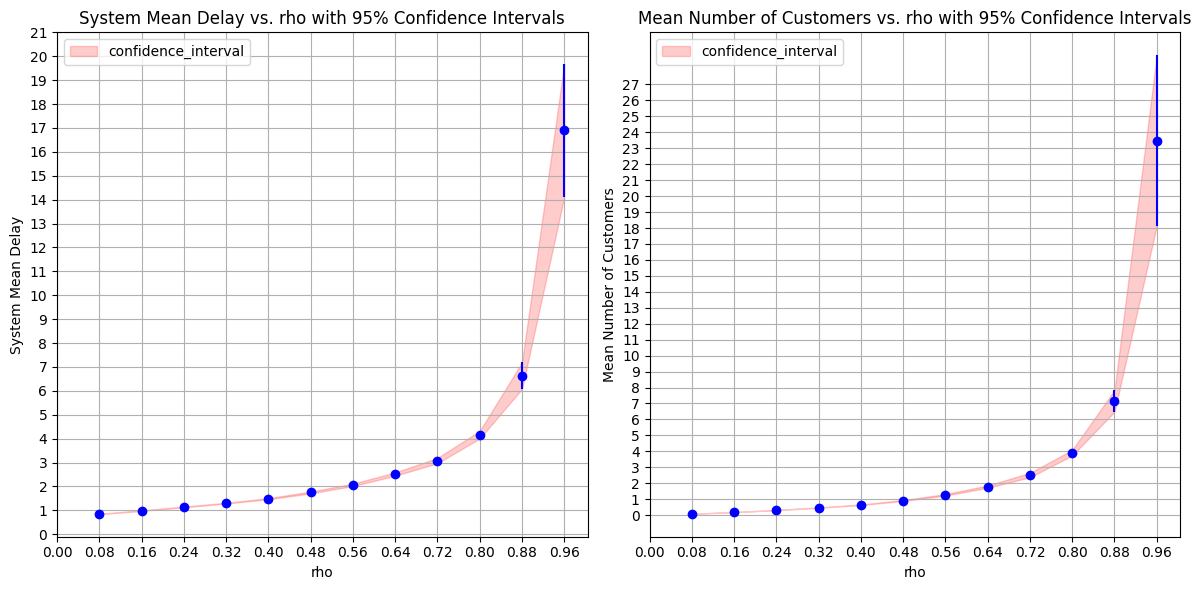

In [177]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(np.arange(1, 13) * 0.08, means_delay, yerr=confidence_intervals_delay, fmt='o', color='b')
plt.fill_between(np.arange(1, 13) * 0.08, np.array(means_delay) - np.array(confidence_intervals_delay), np.array(means_delay) + np.array(confidence_intervals_delay),label="confidence_interval", color='r', alpha=0.2)
plt.xlabel('rho')
plt.ylabel('System Mean Delay')
plt.title('System Mean Delay vs. rho with 95% Confidence Intervals')
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(np.arange(0,1, step=0.08))  
plt.yticks(np.arange(0, 22, step=1))  



plt.subplot(1, 2, 2)
plt.errorbar(np.arange(1, 13) * 0.08, means_cust, yerr=confidence_intervals_cust, fmt='o', color='b')
plt.fill_between(np.arange(1, 13) * 0.08, np.array(means_cust) - np.array(confidence_intervals_cust), np.array(means_cust) + np.array(confidence_intervals_cust), label="confidence_interval",color='r', alpha=0.2)
plt.xlabel('rho')
plt.ylabel('Mean Number of Customers')
plt.title('Mean Number of Customers vs. rho with 95% Confidence Intervals')
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(np.arange(0,1, step=0.08))  
plt.yticks(np.arange(0, 28, step=1))  


plt.tight_layout()
# plt.savefig("LIFO_HW1_new.pdf")
plt.show()


In [178]:
queue=[]
for i in range(5):
    clock=i 
    heapq.heappush(queue, clock)
    print(queue)
print("\npop:")   
for i in range(5):
    print(queue)
    heapq.heappop(queue)
    

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]

pop:
[0, 1, 2, 3, 4]
[1, 3, 2, 4]
[2, 3, 4]
[3, 4]
[4]
